# Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Raw Data + Preprocessing

In [42]:
extreme_weather_df = pd.read_csv('/content/df_extreme_weather.csv')
extreme_weather_df.head()

,id,date,code,text,year,month
0,1,2018-08-29,EHA,Toronto's Medical Officer of Health has issued...,2018,8
1,2,2018-08-28,HA,Toronto's Medical Officer of Health has issued...,2018,8
2,3,2018-08-27,HA,Toronto's Medical Officer of Health has issued...,2018,8
3,4,2018-08-06,HA,Toronto's Medical Officer of Health has issued...,2018,8
4,5,2018-08-05,HA,Toronto's Medical Officer of Health has issued...,2018,8


In [43]:
#rename date into Date
extreme_weather_df.rename(columns={'date':'Date'}, inplace=True)
extreme_weather_df.rename(columns={'text':'Heat_Code_Description'}, inplace=True)

#replace No text for CA as Cold Alert
extreme_weather_df['Heat_Code_Description'] = extreme_weather_df['Heat_Code_Description'].replace('No text', 'Cold Alert')
extreme_weather_df

,id,Date,code,Heat_Code_Description,year,month
0,1,2018-08-29,EHA,Toronto's Medical Officer of Health has issued...,2018,8
1,2,2018-08-28,HA,Toronto's Medical Officer of Health has issued...,2018,8
2,3,2018-08-27,HA,Toronto's Medical Officer of Health has issued...,2018,8
3,4,2018-08-06,HA,Toronto's Medical Officer of Health has issued...,2018,8
4,5,2018-08-05,HA,Toronto's Medical Officer of Health has issued...,2018,8
...,...,...,...,...,...,...
101,102,2019-11-15,CA,Cold Alert,2019,11
102,103,2019-11-16,CA,Cold Alert,2019,11
103,104,2019-12-18,CA,Cold Alert,2019,12
104,105,2019-12-19,CA,Cold Alert,2019,12


In [44]:
ttc_df = pd.read_csv('/content/ttc_combined_df.csv')
ttc_df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2017-01-01,00:29,Sunday,KENNEDY BD STATION,MUSC,0,0,W,BD,5159
1,2017-01-01,01:35,Sunday,ISLINGTON STATION,MUSC,0,0,E,BD,5296
2,2017-01-01,03:00,Sunday,LAWRENCE STATION,EUDO,4,8,S,YU,6056
3,2017-01-01,04:06,Sunday,GREENWOOD YARD,SUUT,0,0,NaN,BD,0
4,2017-01-01,04:20,Sunday,YONGE SHP STATION,PUCSS,0,0,W,SHP,6171
...,...,...,...,...,...,...,...,...,...,...
99305,2024-08-31,01:25,Saturday,ST GEORGE YUS STATION,MUD,5,11,N,YU,5521
99306,2024-08-31,01:33,Saturday,DUNDAS STATION,SUO,13,19,N,YU,5816
99307,2024-08-31,01:37,Saturday,WARDEN STATION,PUSTC,3,9,E,BD,5060
99308,2024-08-31,16:52,Saturday,DON MILLS STATION,SUO,0,0,NaN,SHP,0


In [27]:
processed_weather_data = pd.read_csv('/content/processed_weather_data.csv')
processed_weather_data.head()

,x,y,LOCAL_YEAR,COOLING_DEGREE_DAYS,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_SNOW,HEATING_DEGREE_DAYS,MAX_TEMPERATURE_FLAG,CLIMATE_IDENTIFIER,...,STATION_NAME,SNOW_ON_GROUND,HEATING_DEGREE_DAYS_FLAG,MAX_REL_HUMIDITY_FLAG,COOLING_DEGREE_DAYS_FLAG,TOTAL_SNOW_FLAG,TOTAL_RAIN_FLAG,MAX_TEMPERATURE,PROVINCE_CODE,MAX_REL_HUMIDITY
0,-79.4,43.666667,2017,NaN,0.0,NaN,0.0,NaN,NaN,6158350,...,TORONTO,7.0,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN
1,-79.4,43.666667,2017,NaN,1.4,NaN,0.0,NaN,NaN,6158350,...,TORONTO,6.0,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN
2,-79.4,43.666667,2017,NaN,10.2,NaN,0.0,NaN,NaN,6158350,...,TORONTO,5.0,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN
3,-79.4,43.666667,2017,NaN,0.0,NaN,0.0,NaN,NaN,6158350,...,TORONTO,3.0,NaN,NaN,NaN,T,T,NaN,ON,NaN
4,-79.4,43.666667,2017,NaN,0.0,NaN,0.0,NaN,NaN,6158350,...,TORONTO,1.0,NaN,NaN,NaN,T,NaN,NaN,ON,NaN


In [28]:
processed_weather_data['Date'] = pd.to_datetime(processed_weather_data['LOCAL_DATE'])
processed_weather_data.head()

,x,y,LOCAL_YEAR,COOLING_DEGREE_DAYS,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_SNOW,HEATING_DEGREE_DAYS,MAX_TEMPERATURE_FLAG,CLIMATE_IDENTIFIER,...,SNOW_ON_GROUND,HEATING_DEGREE_DAYS_FLAG,MAX_REL_HUMIDITY_FLAG,COOLING_DEGREE_DAYS_FLAG,TOTAL_SNOW_FLAG,TOTAL_RAIN_FLAG,MAX_TEMPERATURE,PROVINCE_CODE,MAX_REL_HUMIDITY,Date
0,-79.4,43.666667,2017,NaN,0.0,NaN,0.0,NaN,NaN,6158350,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN,2017-01-01
1,-79.4,43.666667,2017,NaN,1.4,NaN,0.0,NaN,NaN,6158350,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN,2017-01-02
2,-79.4,43.666667,2017,NaN,10.2,NaN,0.0,NaN,NaN,6158350,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN,2017-01-03
3,-79.4,43.666667,2017,NaN,0.0,NaN,0.0,NaN,NaN,6158350,...,3.0,NaN,NaN,NaN,T,T,NaN,ON,NaN,2017-01-04
4,-79.4,43.666667,2017,NaN,0.0,NaN,0.0,NaN,NaN,6158350,...,1.0,NaN,NaN,NaN,T,NaN,NaN,ON,NaN,2017-01-05


In [11]:
processed_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8293 entries, 0 to 8292
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   x                         8293 non-null   float64
 1   y                         8293 non-null   float64
 2   LOCAL_YEAR                8293 non-null   int64  
 3   COOLING_DEGREE_DAYS       8088 non-null   float64
 4   TOTAL_RAIN                4117 non-null   float64
 5   MIN_REL_HUMIDITY_FLAG     72 non-null     object 
 6   TOTAL_SNOW                4122 non-null   float64
 7   HEATING_DEGREE_DAYS       8088 non-null   float64
 8   MAX_TEMPERATURE_FLAG      93 non-null     object 
 9   CLIMATE_IDENTIFIER        8293 non-null   object 
 10  LOCAL_MONTH               8293 non-null   int64  
 11  MIN_TEMPERATURE           8110 non-null   float64
 12  SPEED_MAX_GUST_FLAG       2247 non-null   object 
 13  ID                        8293 non-null   object 
 14  SNOW_ON_

In [29]:
weather_col = ['Date', 'TOTAL_RAIN', 'TOTAL_SNOW', 'MIN_TEMPERATURE', 'MAX_TEMPERATURE', 'MEAN_TEMPERATURE', 'STATION_NAME']
processed_weather_data = processed_weather_data[weather_col]
processed_weather_data

,Date,TOTAL_RAIN,TOTAL_SNOW,MIN_TEMPERATURE,MAX_TEMPERATURE,MEAN_TEMPERATURE,STATION_NAME
0,2017-01-01,0.0,0.0,NaN,NaN,NaN,TORONTO
1,2017-01-02,1.4,0.0,NaN,NaN,NaN,TORONTO
2,2017-01-03,10.2,0.0,NaN,NaN,NaN,TORONTO
3,2017-01-04,0.0,0.0,NaN,NaN,NaN,TORONTO
4,2017-01-05,0.0,0.0,NaN,NaN,NaN,TORONTO
...,...,...,...,...,...,...,...
8288,2024-10-16,0.0,0.0,3.5,11.0,7.3,TORONTO NORTH YORK
8289,2024-10-17,0.0,0.0,-1.0,16.0,7.5,TORONTO NORTH YORK
8290,2024-10-18,0.0,0.0,0.5,19.5,10.0,TORONTO NORTH YORK
8291,2024-10-19,0.0,0.0,1.5,20.5,11.0,TORONTO NORTH YORK


In [30]:
processed_weather_data['STATION_NAME'].unique()

array(['TORONTO', 'TORONTO CITY', 'TORONTO CITY CENTRE',
       'TORONTO BUTTONVILLE A', 'TORONTO INTL A', 'TORONTO NORTH YORK'],
      dtype=object)

In [31]:
processed_weather_data.isna().sum()

,0
Date,0
TOTAL_RAIN,4176
TOTAL_SNOW,4171
MIN_TEMPERATURE,183
MAX_TEMPERATURE,196
MEAN_TEMPERATURE,205
STATION_NAME,0


In [32]:
processed_weather_data.dropna(inplace=True)
processed_weather_data['STATION_NAME'].unique()

array(['TORONTO BUTTONVILLE A', 'TORONTO INTL A', 'TORONTO NORTH YORK'],
      dtype=object)

In [33]:
processed_weather_data.sort_values(by='Date')

,Date,TOTAL_RAIN,TOTAL_SNOW,MIN_TEMPERATURE,MAX_TEMPERATURE,MEAN_TEMPERATURE,STATION_NAME
4275,2017-01-01,0.0,0.0,-5.6,2.0,-1.8,TORONTO BUTTONVILLE A
4894,2017-01-01,0.0,0.0,-2.5,1.8,-0.4,TORONTO INTL A
6653,2017-01-01,0.0,0.0,-2.5,3.0,0.3,TORONTO NORTH YORK
4276,2017-01-02,0.0,0.0,-6.0,3.3,-1.4,TORONTO BUTTONVILLE A
4895,2017-01-02,0.0,0.0,-4.1,4.8,0.4,TORONTO INTL A
...,...,...,...,...,...,...,...
6648,2024-10-21,0.0,0.0,12.3,26.1,19.2,TORONTO INTL A
6649,2024-10-22,0.0,0.0,10.5,23.4,17.0,TORONTO INTL A
6650,2024-10-23,0.0,0.0,6.9,21.8,14.4,TORONTO INTL A
6651,2024-10-24,0.0,0.0,3.2,11.9,7.6,TORONTO INTL A


In [34]:
daily_weather_df = processed_weather_data.groupby('Date').agg({
    'TOTAL_RAIN': 'mean',          # Average total rain per date
    'TOTAL_SNOW': 'mean',          # Average total snow per date
    'MEAN_TEMPERATURE': 'mean',    # Average mean temperature per date
    'MIN_TEMPERATURE': 'min',      # Minimum temperature from the stations per date
    'MAX_TEMPERATURE': 'max'       # Maximum temperature from the stations per date
}).reset_index()

daily_weather_df

,Date,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE
0,2017-01-01,0.000000,0.0,-0.633333,-5.6,3.0
1,2017-01-02,1.133333,0.0,-0.433333,-6.0,4.8
2,2017-01-03,15.900000,0.0,3.200000,1.7,4.4
3,2017-01-04,0.100000,0.0,-2.650000,-8.5,3.5
4,2017-01-05,0.000000,0.0,-8.800000,-11.9,-6.5
...,...,...,...,...,...,...
1753,2024-10-21,0.000000,0.0,19.200000,12.3,26.1
1754,2024-10-22,0.000000,0.0,17.000000,10.5,23.4
1755,2024-10-23,0.000000,0.0,14.400000,6.9,21.8
1756,2024-10-24,0.000000,0.0,7.600000,3.2,11.9


# Merge Datasets

In [130]:
merged_df_1 = pd.merge(ttc_df, extreme_weather_df, on='Date', how='left')
merged_df_1

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,id,code,Heat_Code_Description,year,month
0,2017-01-01,00:29,Sunday,KENNEDY BD STATION,MUSC,0,0,W,BD,5159,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,01:35,Sunday,ISLINGTON STATION,MUSC,0,0,E,BD,5296,NaN,NaN,NaN,NaN,NaN
2,2017-01-01,03:00,Sunday,LAWRENCE STATION,EUDO,4,8,S,YU,6056,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,04:06,Sunday,GREENWOOD YARD,SUUT,0,0,NaN,BD,0,NaN,NaN,NaN,NaN,NaN
4,2017-01-01,04:20,Sunday,YONGE SHP STATION,PUCSS,0,0,W,SHP,6171,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99305,2024-08-31,01:25,Saturday,ST GEORGE YUS STATION,MUD,5,11,N,YU,5521,NaN,NaN,NaN,NaN,NaN
99306,2024-08-31,01:33,Saturday,DUNDAS STATION,SUO,13,19,N,YU,5816,NaN,NaN,NaN,NaN,NaN
99307,2024-08-31,01:37,Saturday,WARDEN STATION,PUSTC,3,9,E,BD,5060,NaN,NaN,NaN,NaN,NaN
99308,2024-08-31,16:52,Saturday,DON MILLS STATION,SUO,0,0,NaN,SHP,0,NaN,NaN,NaN,NaN,NaN


In [138]:
daily_weather_df['Date'] = pd.to_datetime(daily_weather_df['Date'])
merged_df_1['Date'] = pd.to_datetime(merged_df_1['Date'])
merged_df = pd.merge(merged_df_1, daily_weather_df, on='Date', how='left')
merged_df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,id,code,Heat_Code_Description,year,month,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE
0,2017-01-01,00:29,Sunday,KENNEDY BD STATION,MUSC,0,0,W,BD,5159,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.633333,-5.6,3.0
1,2017-01-01,01:35,Sunday,ISLINGTON STATION,MUSC,0,0,E,BD,5296,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.633333,-5.6,3.0
2,2017-01-01,03:00,Sunday,LAWRENCE STATION,EUDO,4,8,S,YU,6056,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.633333,-5.6,3.0
3,2017-01-01,04:06,Sunday,GREENWOOD YARD,SUUT,0,0,NaN,BD,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.633333,-5.6,3.0
4,2017-01-01,04:20,Sunday,YONGE SHP STATION,PUCSS,0,0,W,SHP,6171,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.633333,-5.6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99305,2024-08-31,01:25,Saturday,ST GEORGE YUS STATION,MUD,5,11,N,YU,5521,NaN,NaN,NaN,NaN,NaN,6.4,0.0,22.100000,16.1,28.1
99306,2024-08-31,01:33,Saturday,DUNDAS STATION,SUO,13,19,N,YU,5816,NaN,NaN,NaN,NaN,NaN,6.4,0.0,22.100000,16.1,28.1
99307,2024-08-31,01:37,Saturday,WARDEN STATION,PUSTC,3,9,E,BD,5060,NaN,NaN,NaN,NaN,NaN,6.4,0.0,22.100000,16.1,28.1
99308,2024-08-31,16:52,Saturday,DON MILLS STATION,SUO,0,0,NaN,SHP,0,NaN,NaN,NaN,NaN,NaN,6.4,0.0,22.100000,16.1,28.1


In [139]:
merged_df.isna().sum()

,0
Date,0
Time,0
Day,0
Station,0
Code,1
Min Delay,0
Min Gap,0
Bound,27776
Line,265
Vehicle,0


In [140]:
# drop NaN in day
merged_df.dropna(subset=['Code'], inplace=True)
merged_df.isna().sum()

,0
Date,0
Time,0
Day,0
Station,0
Code,0
Min Delay,0
Min Gap,0
Bound,27776
Line,265
Vehicle,0


In [141]:
merged_df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,id,code,Heat_Code_Description,year,month,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE
0,2017-01-01,00:29,Sunday,KENNEDY BD STATION,MUSC,0,0,W,BD,5159,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.633333,-5.6,3.0
1,2017-01-01,01:35,Sunday,ISLINGTON STATION,MUSC,0,0,E,BD,5296,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.633333,-5.6,3.0
2,2017-01-01,03:00,Sunday,LAWRENCE STATION,EUDO,4,8,S,YU,6056,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.633333,-5.6,3.0
3,2017-01-01,04:06,Sunday,GREENWOOD YARD,SUUT,0,0,NaN,BD,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.633333,-5.6,3.0
4,2017-01-01,04:20,Sunday,YONGE SHP STATION,PUCSS,0,0,W,SHP,6171,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.633333,-5.6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99305,2024-08-31,01:25,Saturday,ST GEORGE YUS STATION,MUD,5,11,N,YU,5521,NaN,NaN,NaN,NaN,NaN,6.4,0.0,22.100000,16.1,28.1
99306,2024-08-31,01:33,Saturday,DUNDAS STATION,SUO,13,19,N,YU,5816,NaN,NaN,NaN,NaN,NaN,6.4,0.0,22.100000,16.1,28.1
99307,2024-08-31,01:37,Saturday,WARDEN STATION,PUSTC,3,9,E,BD,5060,NaN,NaN,NaN,NaN,NaN,6.4,0.0,22.100000,16.1,28.1
99308,2024-08-31,16:52,Saturday,DON MILLS STATION,SUO,0,0,NaN,SHP,0,NaN,NaN,NaN,NaN,NaN,6.4,0.0,22.100000,16.1,28.1


In [142]:
merged_df.to_csv('merged_df.csv', index=False)

# Visualizations

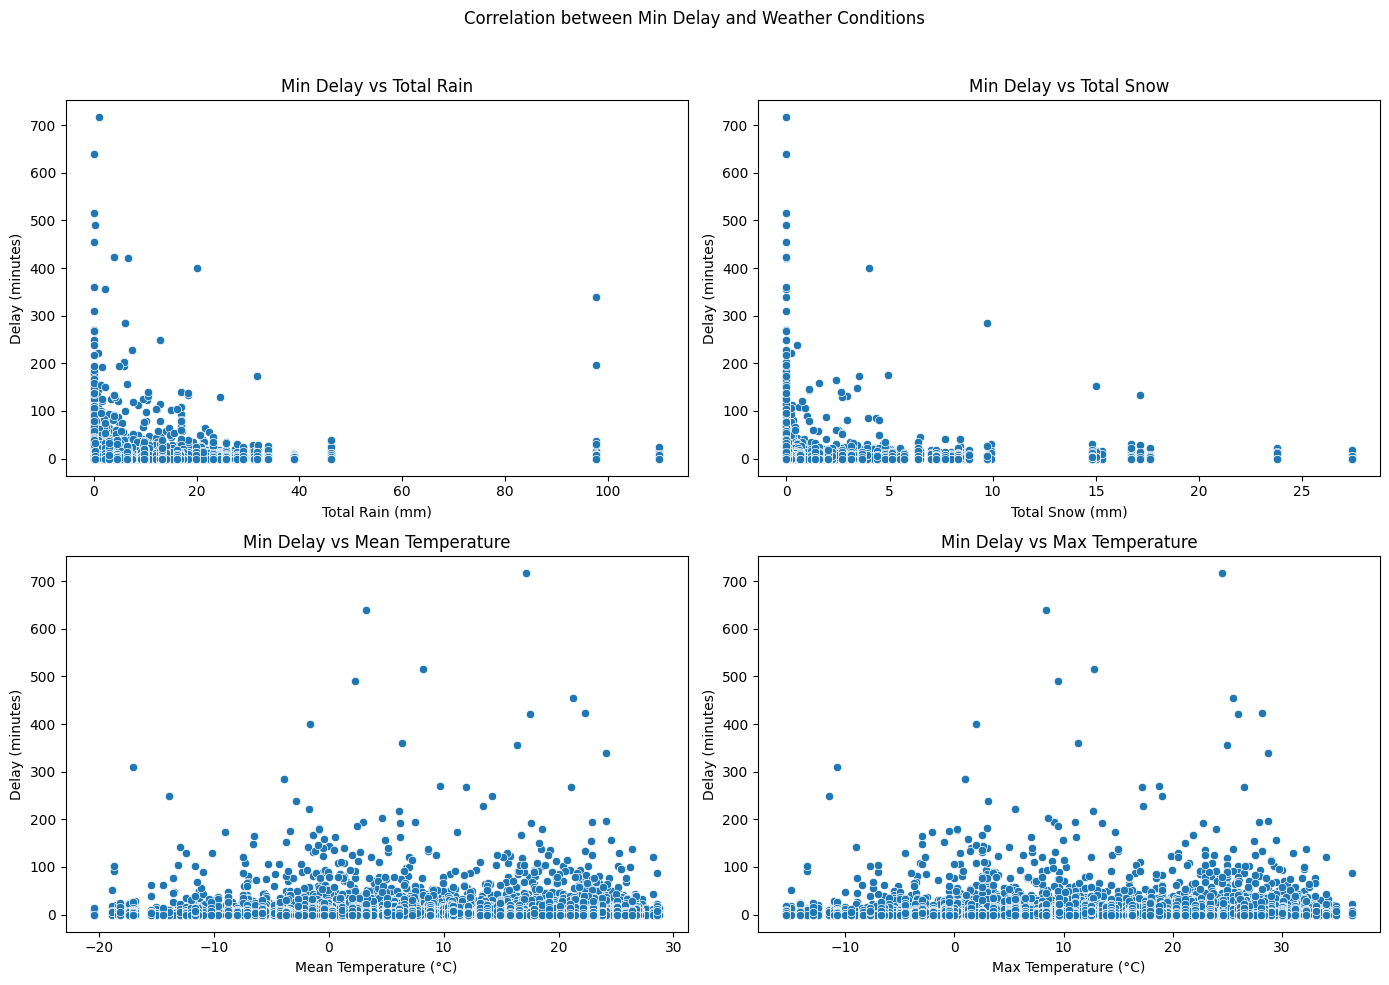

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure for correlation between Min Delay and weather conditions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Correlation between Min Delay and Weather Conditions')

# Scatter plot of Min Delay vs Total Rain
sns.scatterplot(data=merged_df, x='TOTAL_RAIN', y='Min Delay', ax=axes[0, 0])
axes[0, 0].set_title('Min Delay vs Total Rain')
axes[0, 0].set_xlabel('Total Rain (mm)')
axes[0, 0].set_ylabel('Delay (minutes)')

# Scatter plot of Min Delay vs Total Snow
sns.scatterplot(data=merged_df, x='TOTAL_SNOW', y='Min Delay', ax=axes[0, 1])
axes[0, 1].set_title('Min Delay vs Total Snow')
axes[0, 1].set_xlabel('Total Snow (mm)')
axes[0, 1].set_ylabel('Delay (minutes)')

# Scatter plot of Min Delay vs Mean Temperature
sns.scatterplot(data=merged_df, x='MEAN_TEMPERATURE', y='Min Delay', ax=axes[1, 0])
axes[1, 0].set_title('Min Delay vs Mean Temperature')
axes[1, 0].set_xlabel('Mean Temperature (°C)')
axes[1, 0].set_ylabel('Delay (minutes)')

# Scatter plot of Min Delay vs Max Temperature
sns.scatterplot(data=merged_df, x='MAX_TEMPERATURE', y='Min Delay', ax=axes[1, 1])
axes[1, 1].set_title('Min Delay vs Max Temperature')
axes[1, 1].set_xlabel('Max Temperature (°C)')
axes[1, 1].set_ylabel('Delay (minutes)')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

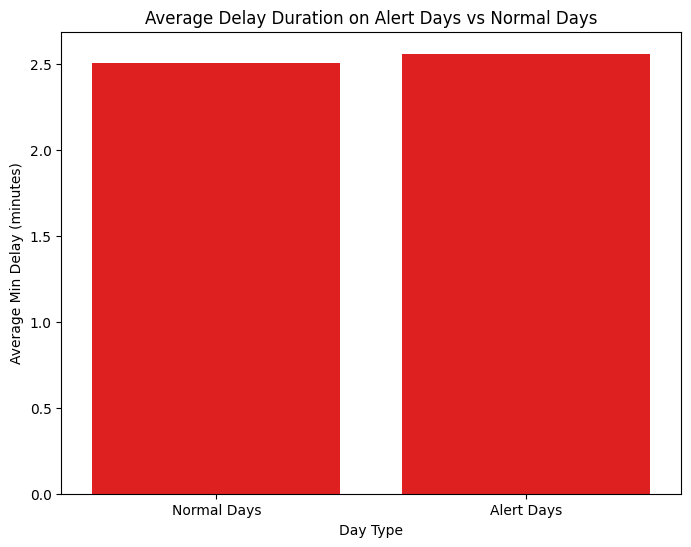

In [144]:
# Bar chart for average Min Delay on days with extreme weather alerts vs. normal days
# Categorize days with extreme weather alerts (non-null 'Heat_Code_Description' indicates alert day)
merged_df['Alert_Day'] = merged_df['Heat_Code_Description'].notnull().astype(int)
avg_delay_by_alert = merged_df.groupby('Alert_Day')['Min Delay'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_delay_by_alert.index, y=avg_delay_by_alert.values, color='red')
plt.xticks([0, 1], ['Normal Days', 'Alert Days'])
plt.title('Average Delay Duration on Alert Days vs Normal Days')
plt.xlabel('Day Type')
plt.ylabel('Average Min Delay (minutes)')
plt.show()


In [146]:
extreme_delays = merged_df[merged_df['Min Delay'] > 30]
extreme_delay_weather = extreme_delays[['MIN_TEMPERATURE', 'MAX_TEMPERATURE', 'MEAN_TEMPERATURE']]
extreme_delay_weather

,MIN_TEMPERATURE,MAX_TEMPERATURE,MEAN_TEMPERATURE
22,-5.6,3.0,-0.633333
23,-5.6,3.0,-0.633333
365,-13.6,-7.0,-11.000000
613,-2.3,8.9,2.500000
631,-2.3,8.9,2.500000
...,...,...,...
98705,11.5,26.0,19.150000
98706,11.5,26.0,19.150000
98844,15.5,29.0,22.250000
98940,20.5,32.2,26.400000


In [147]:
extreme_delay_weather_df = extreme_delay_weather.dropna()
extreme_delay_weather_df.describe()

,MIN_TEMPERATURE,MAX_TEMPERATURE,MEAN_TEMPERATURE
count,649.000000,649.000000,649.000000
mean,3.570724,14.294607,9.154777
std,10.294271,11.476824,10.751875
min,-25.500000,-15.000000,-18.900000
25%,-3.500000,4.000000,0.633333
50%,4.000000,14.300000,9.066667
75%,12.500000,25.000000,18.566667
max,22.200000,36.400000,28.533333


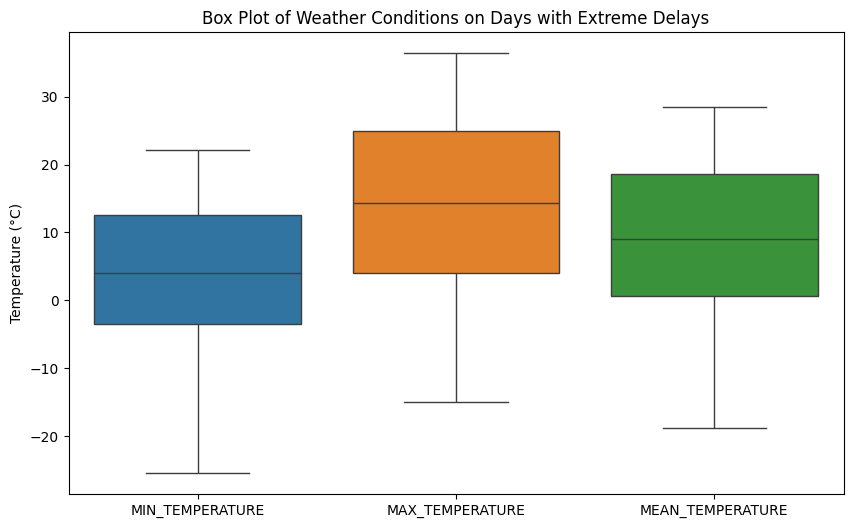

In [148]:
# box plot of extreme_delay_weather_df
plt.figure(figsize=(10, 6))
sns.boxplot(data=extreme_delay_weather_df)
plt.title('Box Plot of Weather Conditions on Days with Extreme Delays')
plt.ylabel('Temperature (°C)')
plt.show()

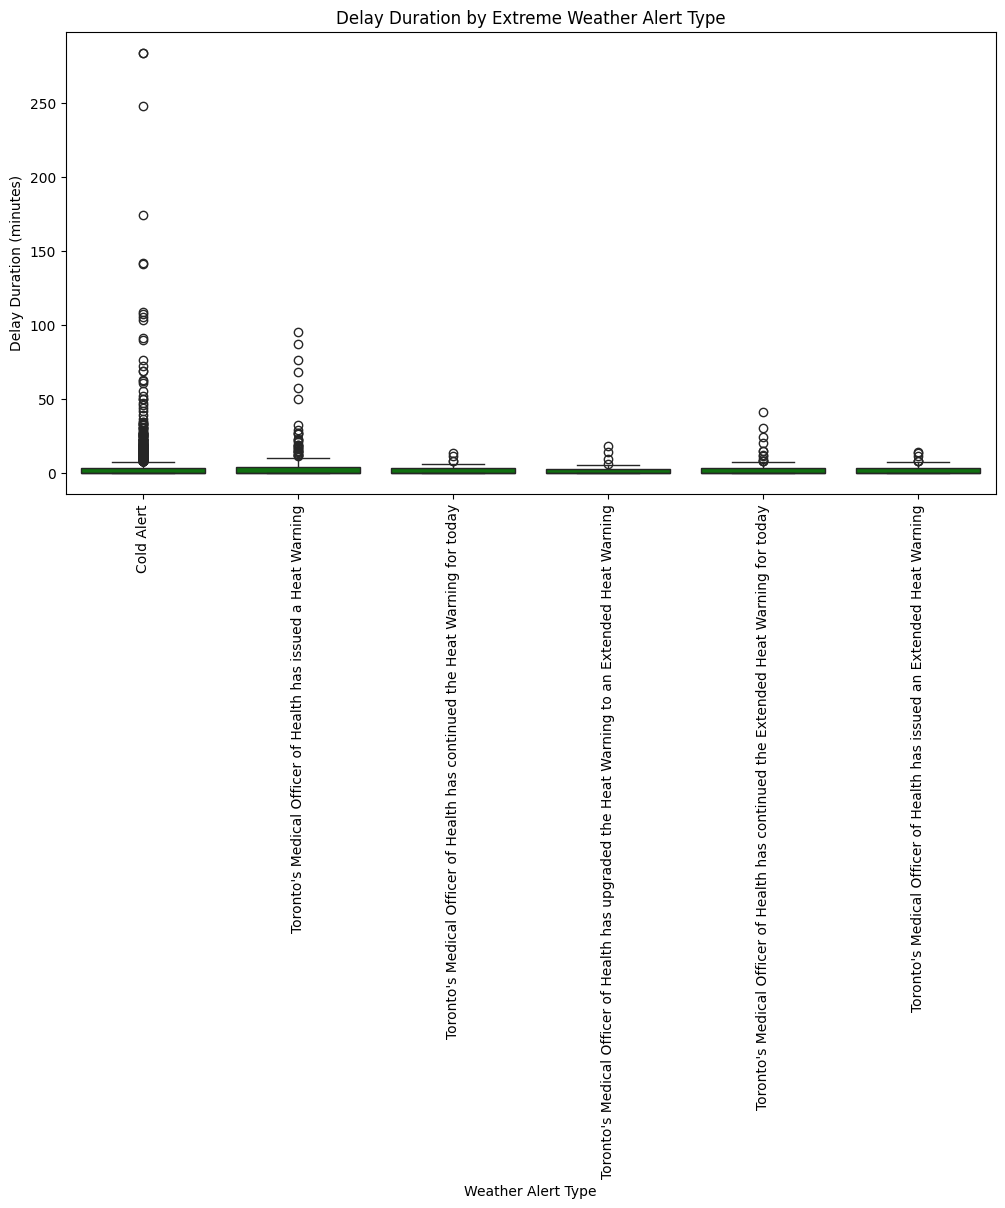

In [149]:
merged_df['Alert_Day'] = merged_df['Heat_Code_Description'].notnull().astype(int)

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='Heat_Code_Description', y='Min Delay', color='green')
plt.title('Delay Duration by Extreme Weather Alert Type')
plt.xlabel('Weather Alert Type')
plt.ylabel('Delay Duration (minutes)')
plt.xticks(rotation=90)
plt.show()


<ipython-input-150-79bb0cf8f373>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay_by_day_alert = merged_df.groupby(['Day', 'Alert_Day'])['Min Delay'].mean().unstack()


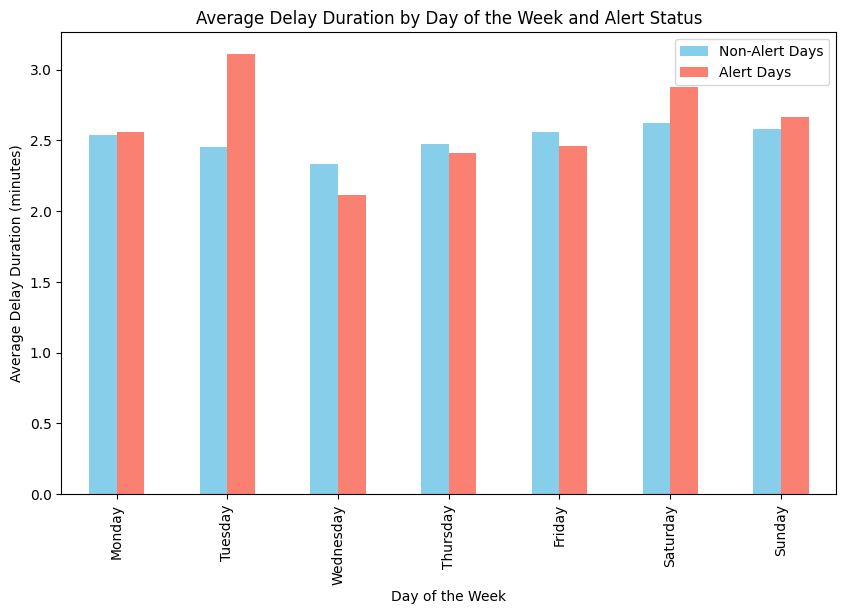

In [150]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
merged_df['Day'] = pd.Categorical(merged_df['Day'], categories=day_order, ordered=True)
avg_delay_by_day_alert = merged_df.groupby(['Day', 'Alert_Day'])['Min Delay'].mean().unstack()

avg_delay_by_day_alert.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Average Delay Duration by Day of the Week and Alert Status')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay Duration (minutes)')
plt.legend(['Non-Alert Days', 'Alert Days'])
plt.show()